- Regression
The data is in 'housing.csv'. <br>
Each row in the table is a data point:  the features of an area in California <br>
Clearly, the `median_house_value` is correlated with some other features, e.g., `median_income` and location <br>
Thus, we can estimate `median_house_value` = regression_model(`median_income`, `longitude`, `latitude`, ...) <br>
The taks is to build regressors to predict `median_house_value` using the other features <br>
If you need some motivation to do this task, see this <br>
A similar dataset on https://www.kaggle.com/c/zillow-prize-1 ($1,200,000)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
housing = pd.read_csv("/Users/antoniogondim/Downloads/MachineLearning_UM/hw3s/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# there are 207 NaN in the column 'total_bedrooms', remove them
# check housing again using housing.isnull().sum()
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


### Visualize the data

Text(0.5, 1.0, 'median_income')

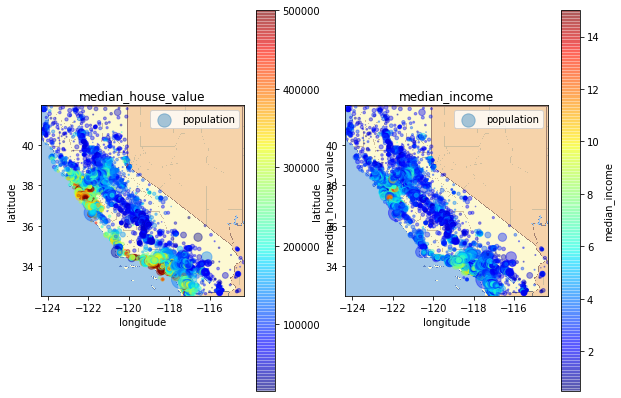

In [8]:
from skimage.io import imread
california_img = imread('california.png')
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)
y1 = min(housing["latitude"].values)
y2 = max(housing["latitude"].values)
#---------------------------------------------
# the parameter c refers to color
# thus, median_house_value is color-coded in the left plot
fig, ax =plt.subplots(1,2)
housing.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
#---------------------------------------------
# the parameter c refers to color
# thus, median_income is color-coded in the right plot
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('median_house_value')
housing.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
             s=housing['population']/100, label="population",
             c="median_income", cmap=plt.get_cmap("jet"),
             colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('median_income')

### Prepare the Training and Testing Datasets

In [8]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


In [9]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [10]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values
Y=Y.values

In [11]:
#trainnig, validation, testing split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [12]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) # think about why fit to X_train, not X ?
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [13]:
type(X_train)

numpy.ndarray


(1) build a linear regression model to predict Y given X <br>
(2) build a KNN regression model to predict Y given X  <br>
(3) build a random-forest regression model to predict Y given X  <br>

### 1. LinearRegression from sklearn.linear_model

In [15]:
# step1: create a linear model, we assume the name of the model is linear_model
# step2: train/fit the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = linear_model.predict(X_train)
#        Y_test_pred = linear_model.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method linear_model.score(...) on the training set and the testing set
# step6: plot Y_train vs Y_train_pred, plot Y_test vs Y_test_pred
# step7: visualize the result on the California map

In [14]:
#step1:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

In [15]:
#step2:
linear_model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#step3:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

In [17]:
type(Y_test_pred)

numpy.ndarray

In [18]:
#step4:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 4675883082.884457
MAE= 49675.607031261425
MAPE= 0.28700385560129493
Evaluate model on testing set
MSE= 4715994821.142622
MAE= 49655.95240199433
MAPE= 0.2895136136935611


In [24]:
print('R2 on training set:  ', linear_model.score(X_train,Y_train))
print('R2 on test set:  ', linear_model.score(X_test,Y_test))


R2 on training set:   0.6506129676781593
R2 on test set:   0.6383314474472391


Text(0, 0.5, 'Y_train_pred')

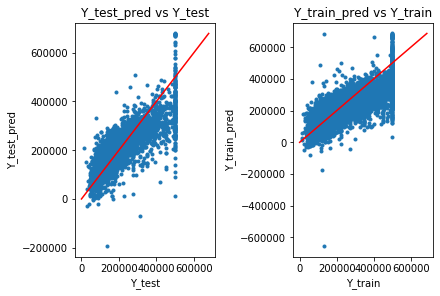

In [22]:
#step6: 
# the red line is the 45-degree line
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

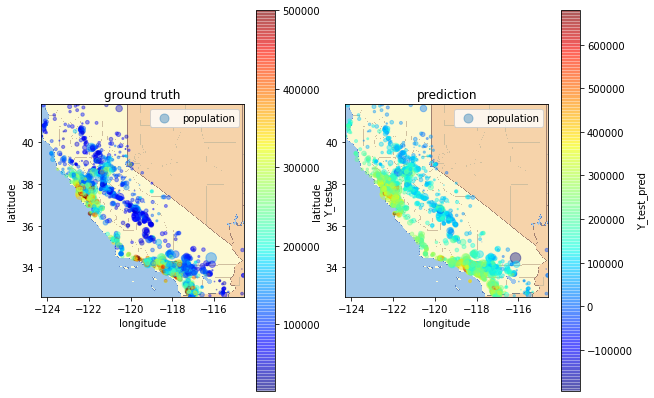

In [23]:
#step7:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

In [24]:
Y_test.shape

(4128,)

### 2. KNeighborsRegressor from sklearn.neighbors.KNeighborsRegressor

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# step1: create a knn regression model, we assume the name of the model is knn, set n_neighbors=5
# step2: train the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = knn.predict(X_train)
#        Y_test_pred = knn.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method knn.score(...) on the training set and the testing set
# step6: scatter plot Y_train vs Y_train_pred, scatter plot Y_test vs Y_test_pred
# step7: visualze the result on the map
# write each step in a cell

In [42]:
#step1:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)


In [43]:
#step2:
knn.fit(X_train, Y_train)


KNeighborsRegressor()

In [44]:
#step3:
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)
type(Y_train_pred),type(Y_test_pred)

(numpy.ndarray, numpy.ndarray)

In [37]:
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)


Evaluate model on traning set
MSE= 2536673978.865168
MAE= 33662.21060565276
MAPE= 0.18121674624371772
Evaluate model on testing set
MSE= 3995148983.11626
MAE= 42816.31531007752
MAPE= 0.23257627257406085


In [39]:
#step5:
print('R2 on training set:  ', knn.score(X_train,Y_train))
print('R2 on test set:  ', knn.score(X_test,Y_test))

R2 on training set:   0.8104569815511709
R2 on test set:   0.6936129481146869


Text(0, 0.5, 'Y_train_pred')

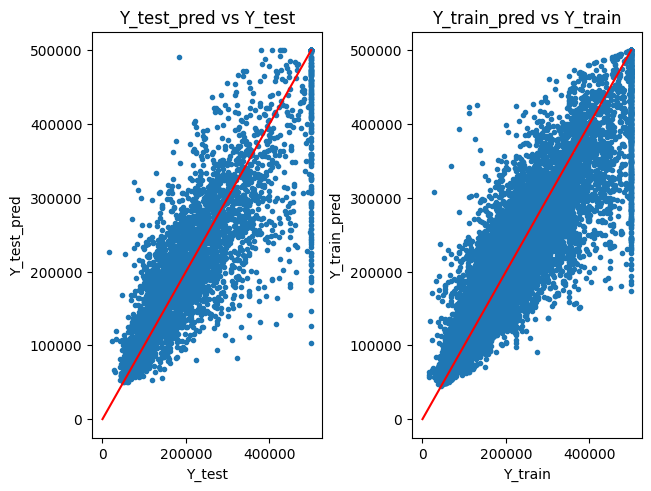

In [45]:
# step 6
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

/var/folders/6n/7_877_t5759dwptr6pjtd4b00000gn/T/ipykernel_10958/1305601378.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  california_img = imread('california.png')


Text(0.5, 1.0, 'prediction')

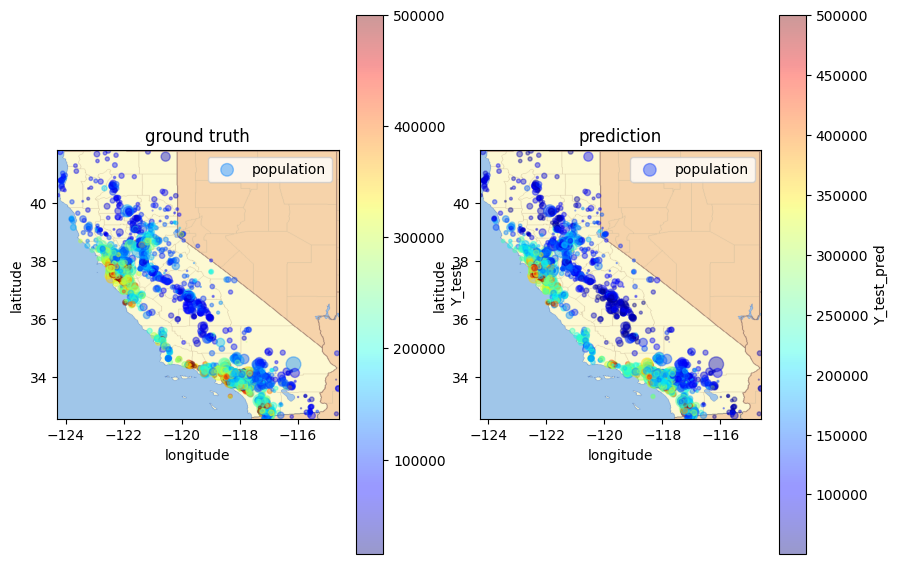

In [48]:
#step 7:
from imageio import imread
california_img = imread('california.png')
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3(a). RandomForestRegressor from sklearn.ensemble

In [33]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# step1: create a RF regression model, we assume the name of the model is RF
#        set n_estimators=20, max_depth=10, and random_state=0
# step2: train the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = RF.predict(X_train)
#        Y_test_pred = RF.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method RF.score(...) on the training set and the testing set
# step6: scatter plot Y_train vs Y_train_pred, scatter plot Y_test vs Y_test_pred
# step7: visualze the result on the map
# write each step in a cell

In [49]:
#step1:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=20,max_depth=10,random_state=0)



In [50]:
#step2:
RF.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, n_estimators=20, random_state=0)

In [51]:
#step3:
Y_train_pred = RF.predict(X_train)
Y_test_pred = RF.predict(X_test)

In [53]:
#step4:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 1945491639.701538
MAE= 30476.40665806301
MAPE= 0.17315781021344928
Evaluate model on testing set
MSE= 2942752580.893462
MAE= 36889.27001864772
MAPE= 0.20957638311965976


In [54]:
#step5:
print('R2 on training set:  ', RF.score(X_train,Y_train))
print('R2 on test set:  ', RF.score(X_test,Y_test))

R2 on training set:   0.8546307642100066
R2 on test set:   0.7743209848998999


Text(0, 0.5, 'Y_train_pred')

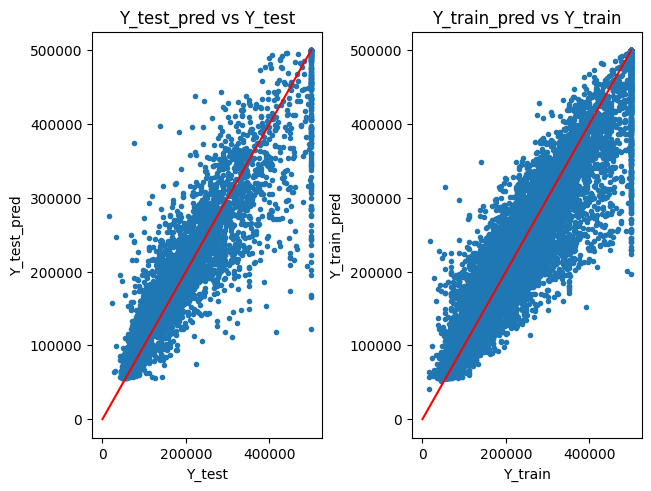

In [55]:
#step6:
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

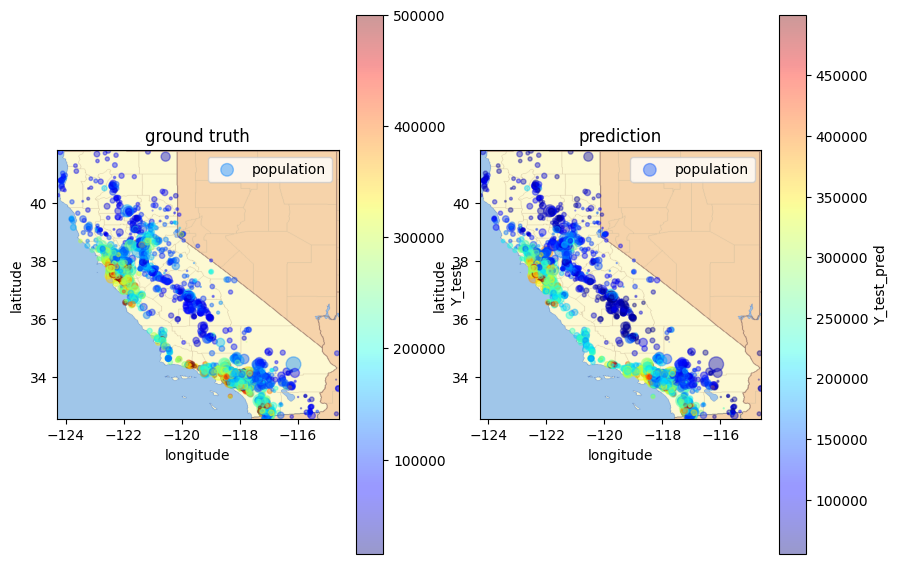

In [56]:
#step7:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

### 3(b). Find the best max_depth in RandomForestRegressor
In the previous sub-task, we set max_depth=10. <br>
In this section, we will use grid-search to find the best value of max_depth.

In [57]:
#create an array of possible max_depth
# you may need the function np.arange
# The minimum value of max_depth is 1, obviously.
# assume the name of the array is max_depth_list

max_depth_list=np.arange(1,92,10)
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [60]:
#train a RandomForestRegressor with max_depth in max_depth_list
#inside a for loop: 
#   create a model with a max_depth in max_depth_list
#   set  n_estimators=20
#   set random_state=0 so that the result is reproducible
#   train the model on the training set
#   record the MAE on the training set (X_train, Y_train) into a list MAE_train_list
#   record the MAE on the validation set (X_val, Y_val) into a list MAE_val_list
MAE_train_list=[]
MAE_val_list=[]
for max_depth in max_depth_list:
    RF=RandomForestRegressor(n_estimators=20,max_depth=max_depth,random_state=0)
    RF.fit(X_train,Y_train)
    Y_train_pred = RF.predict(X_train)
    Y_val_pred = RF.predict(X_val)
    MAE_train_list.append(np.mean(np.abs(Y_train - Y_train_pred)))
    MAE_val_list.append(np.mean(np.abs(Y_val - Y_val_pred)))
    
    


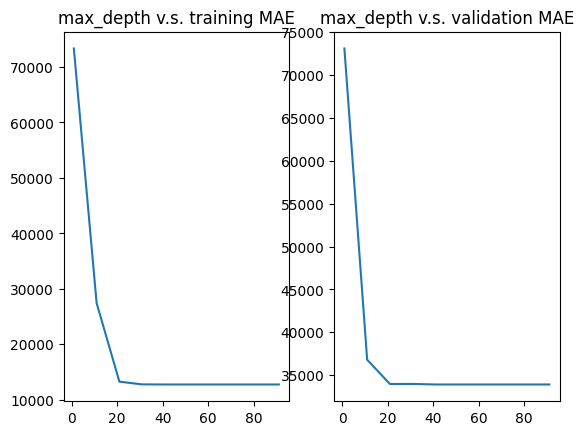

In [68]:
#plot max_depth vs MAE_train using max_depth_list and MAE_train_list
#plot max_depth vs MAE_val using max_depth_list and MAE_val_list
fig,ax=plt.subplots(1,2)
ax[0].set_title('max_depth v.s. training MAE')
ax[0].plot(max_depth_list,MAE_train_list)
ax[1].set_title('max_depth v.s. validation MAE')
ax[1].plot(max_depth_list,MAE_val_list)
plt.show()

Trainig MAE and validation MAE keep decreasing as max_depth increases. <br>
To determine the optimal max_depth, we may need to consider both validation accuracy and model complexity:  <br>
select a small max_depth with high validation accuracy <br>
We could use the elbow method: <br>
starting from the best max_depth, the validation accuracy becomes "almost" flat. <br>
Thus, the best max_depth could be around 20

In [70]:
max_depth_best=20

In [72]:
#now, we use the best max_depth to build a RandomForestRegressor
#train it on the training set and evaluate it on the testing set
RF=RandomForestRegressor(n_estimators=20,max_depth=20,random_state=0)
RF.fit(X_train,Y_train)
Y_train_pred = RF.predict(X_train)
Y_test_pred = RF.predict(X_test)
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)


Evaluate model on traning set
MSE= 435606661.65019244
MAE= 13579.964241328715
MAPE= 0.07572628237193048
Evaluate model on testing set
MSE= 2451979002.3817043
MAE= 32557.09369858054
MAPE= 0.18540296962723968


MAPE on the test set is reduced by using max_depth=20

We can obtain feature importances stored in RF.feature_importances_

<BarContainer object of 13 artists>

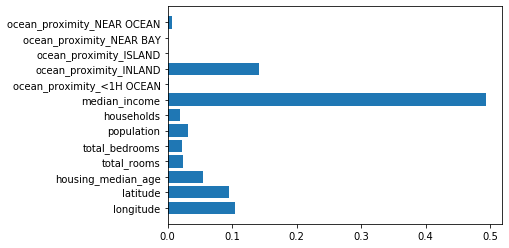

In [46]:
plt.barh(y=X_columns, width=RF.feature_importances_)

The most important two features are median_income and ocean_proximity_inland <br>
You may select the top-N important features and re-do the regression. <br>
The purpuse of feature selection is to remove those features irrelevant to the task <br>
Question to think about: <br>
The top-N important features are important only for RandomForestRegressor ? <br>
or they are important for the regression task (no matter what model you use)? <br>
(there is no definite answer)

### 4. XGBRegressor
using XGBRegressor from xgboost.sklearn <br>
https://xgboost.readthedocs.io/en/latest/python/python_api.html <br>
set n_estimators=20, random_state=0, objective='reg:squarederror' <br>
find the best value of max_depth using grid-search <br>
test the model on the testing set

In [75]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.6 MB/s eta 0:00:0000:0100:01


In [82]:
from xgboost.sklearn import XGBRegressor as xgb

In [91]:
#create an array of possible max_depth
max_depth_list=np.arange(1,92,10)

In [94]:
MAE_train_list1=[]
MAE_val_list1=[]
#grid search
for i in max_depth_list:
    xgb = XGBRegressor(
    objective='reg:squarederror',
    max_depth=i,
    n_estimators=20,
    random_state=0)
    xgb.fit(X_train,Y_train)
    Y_train_pred=xgb.predict(X_train)
    Y_val_pred=xgb.predict(X_val)
    MAE = np.mean(np.abs(Y_train - Y_train_pred))
    MAE_train_list1.append(MAE)
    MAE = np.mean(np.abs(Y_val - Y_val_pred))
    MAE_val_list1.append(MAE)
    

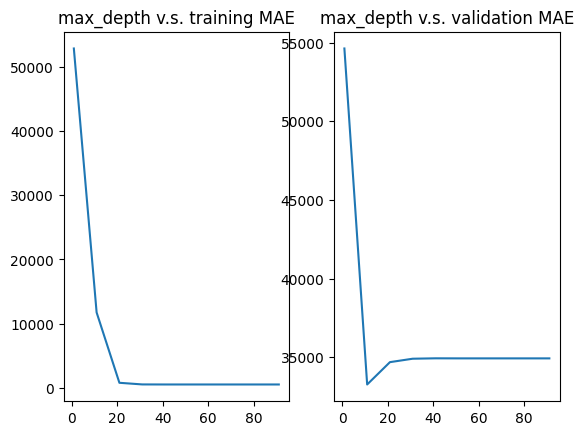

In [95]:
# plot
fig,ax=plt.subplots(1,2)
ax[0].set_title('max_depth v.s. training MAE')
ax[0].plot(max_depth_list,MAE_train_list1)

ax[1].set_title('max_depth v.s. validation MAE')
ax[1].plot(max_depth_list,MAE_val_list1)

In [97]:
#find max_depth_best using np.argmin, max_depth_list and MAE_val_list

max_depth_best=np.argmin(MAE_val_list1)*10+1

In [98]:
max_depth_best

11

In [99]:
#train and test a XGBRegressor using the best max_depth
xgb = XGBRegressor(
    objective='reg:squarederror',
    max_depth=11,
    n_estimators=20,
    random_state=0)
xgb.fit(X_train,Y_train)
Y_train_pred=xgb.predict(X_train)
Y_val_pred=xgb.predict(X_val)
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 304213803.6713753
MAE= 11723.399843723713
MAPE= 0.06996336545625627
Evaluate model on testing set
MSE= 2451979002.3817043
MAE= 32557.09369858054
MAPE= 0.18540296962723968


It seems XGBRegressor is slightly better than RandomForestRegressor <br>
Keep in mind that, we only optimized one hyper-parameter: max_depth <br>
If you want to win a competition or complete a project to make a profit, you may need to perform grid search for all hyper-parameters.